# Understanding Data Representation for Recommendation Systems

This notebook implements the concepts from Lesson 2, exploring different ways to represent text data for our recommendation system.

## 1. Basic Text Representation Techniques

We'll start with the simplest text representation methods: Bag of Words (BoW) and TF-IDF.

In [62]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Set up sample documents
documents = [
    "I love machine learning and AI",
    "Recommendation systems are powerful",
    "AI and machine learning are transforming industries",
    "Natural language processing is a subfield of AI",
    "Deep learning models require large datasets"
]

### 1.1 Bag of Words (BoW)

The Bag of Words model represents text as the count of each word, ignoring grammar and word order.

In [63]:
# Create a Bag of Words representation
bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(documents)

# Get the vocabulary and feature names
bow_vocabulary = bow_vectorizer.get_feature_names_out()
print("BoW vocabulary:", bow_vocabulary)
print("BoW matrix shape:", bow_matrix.shape)

# Convert to a DataFrame for better visualization
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=bow_vocabulary)
print("\nBag of Words representation:")
bow_df

BoW vocabulary: ['ai' 'and' 'are' 'datasets' 'deep' 'industries' 'is' 'language' 'large'
 'learning' 'love' 'machine' 'models' 'natural' 'of' 'powerful'
 'processing' 'recommendation' 'require' 'subfield' 'systems'
 'transforming']
BoW matrix shape: (5, 22)

Bag of Words representation:


,ai,and,are,datasets,deep,industries,is,language,large,learning,...,models,natural,of,powerful,processing,recommendation,require,subfield,systems,transforming
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,1,1,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,1,0,0,...,0,1,1,0,1,0,0,1,0,0
4,0,0,0,1,1,0,0,0,1,1,...,1,0,0,0,0,0,1,0,0,0


### 1.2 TF-IDF (Term Frequency-Inverse Document Frequency)

TF-IDF improves on BoW by weighting terms based on their frequency in the document and rarity across all documents.

In [64]:
# Create a TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Get the vocabulary and feature names
tfidf_vocabulary = tfidf_vectorizer.get_feature_names_out()
print("TF-IDF vocabulary:", tfidf_vocabulary)
print("TF-IDF matrix shape:", tfidf_matrix.shape)

# Convert to a DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vocabulary)
print("\nTF-IDF representation:")
tfidf_df

TF-IDF vocabulary: ['ai' 'and' 'are' 'datasets' 'deep' 'industries' 'is' 'language' 'large'
 'learning' 'love' 'machine' 'models' 'natural' 'of' 'powerful'
 'processing' 'recommendation' 'require' 'subfield' 'systems'
 'transforming']
TF-IDF matrix shape: (5, 22)

TF-IDF representation:


,ai,and,are,datasets,deep,industries,is,language,large,learning,...,models,natural,of,powerful,processing,recommendation,require,subfield,systems,transforming
0,0.374447,0.451092,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.374447,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.422242,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.523358,0.000000,0.523358,0.000000,0.000000,0.523358,0.000000
2,0.304107,0.366355,0.366355,0.000000,0.000000,0.454087,0.000000,0.000000,0.000000,0.304107,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.454087
3,0.263729,0.000000,0.000000,0.000000,0.000000,0.000000,0.393795,0.393795,0.000000,0.000000,...,0.000000,0.393795,0.393795,0.000000,0.393795,0.000000,0.000000,0.393795,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.428411,0.428411,0.000000,0.000000,0.000000,0.428411,0.286912,...,0.428411,0.000000,0.000000,0.000000,0.000000,0.000000,0.428411,0.000000,0.000000,0.000000


### 1.3 Comparing BoW and TF-IDF

Let's visualize the difference between BoW and TF-IDF for a specific document.

In [65]:
# Select a document to compare
doc_index = 0
print(f"Document: '{documents[doc_index]}'\n")

# Create a comparison DataFrame
comparison = pd.DataFrame({
    'Term': tfidf_vocabulary,
    'BoW': bow_matrix.toarray()[doc_index],
    'TF-IDF': tfidf_matrix.toarray()[doc_index]
})

# Sort by TF-IDF score
comparison = comparison.sort_values('TF-IDF', ascending=False)
comparison = comparison[comparison['BoW'] > 0]  # Only show terms that appear in the document
comparison

Document: 'I love machine learning and AI'



,Term,BoW,TF-IDF
10,love,1,0.559117
1,and,1,0.451092
11,machine,1,0.451092
9,learning,1,0.374447
0,ai,1,0.374447


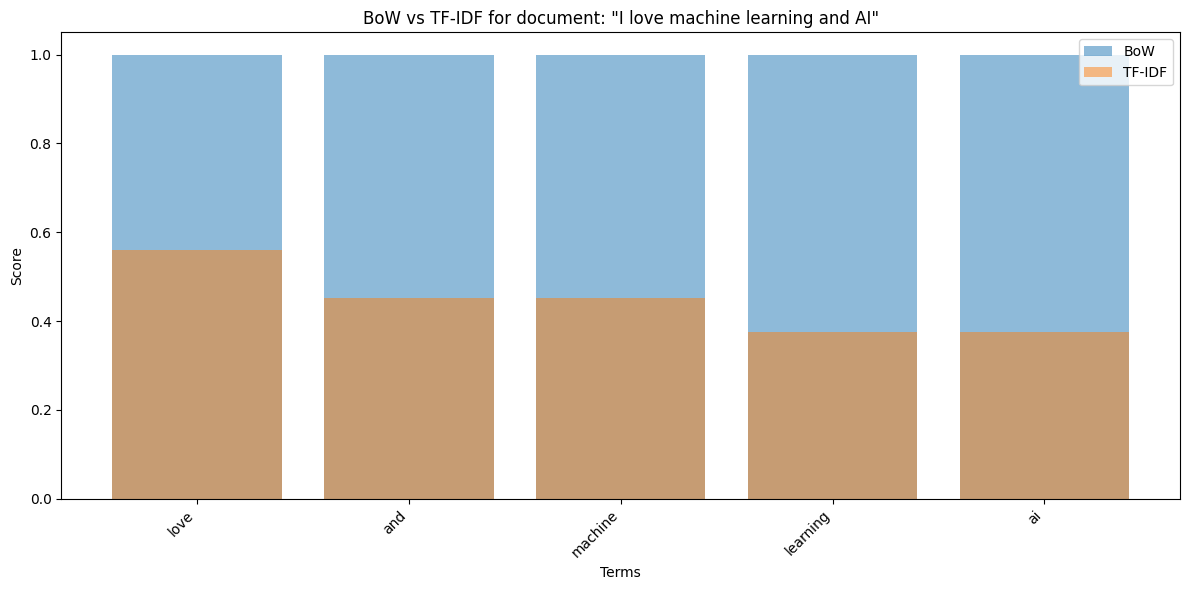

In [66]:
# Visualize the comparison
plt.figure(figsize=(12, 6))
plt.bar(comparison['Term'], comparison['BoW'], alpha=0.5, label='BoW')
plt.bar(comparison['Term'], comparison['TF-IDF'], alpha=0.5, label='TF-IDF')
plt.xlabel('Terms')
plt.ylabel('Score')
plt.title(f'BoW vs TF-IDF for document: "{documents[doc_index]}"')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

## 2. Advanced Text Representation: Word Embeddings

Now let's explore more advanced text representation using word embeddings with Sentence Transformers.

In [67]:
from sentence_transformers import SentenceTransformer

# Install and import sentence-transformers
import sys
import subprocess

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Install sentence-transformers if not already installed
try:
    import sentence_transformers
except ImportError:
    print("Installing sentence-transformers...")
    install("sentence-transformers")
    
from sentence_transformers import SentenceTransformer

# Load pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for our documents
embeddings = model.encode(documents)

print("Embedding shape:", embeddings.shape)
print("Each document is represented by a vector of length", embeddings.shape[1])
print("\nFirst document embedding (first 10 dimensions):\n", embeddings[0][:10])

Embedding shape: (5, 384)
Each document is represented by a vector of length 384

First document embedding (first 10 dimensions):
 [-0.02221858 -0.06907646  0.05953147 -0.0161461   0.0937983  -0.05084426
  0.00356373  0.00978229  0.03059049  0.02350495]


### 2.1 Visualizing Embeddings

Let's visualize our document embeddings in 2D space using dimensionality reduction.

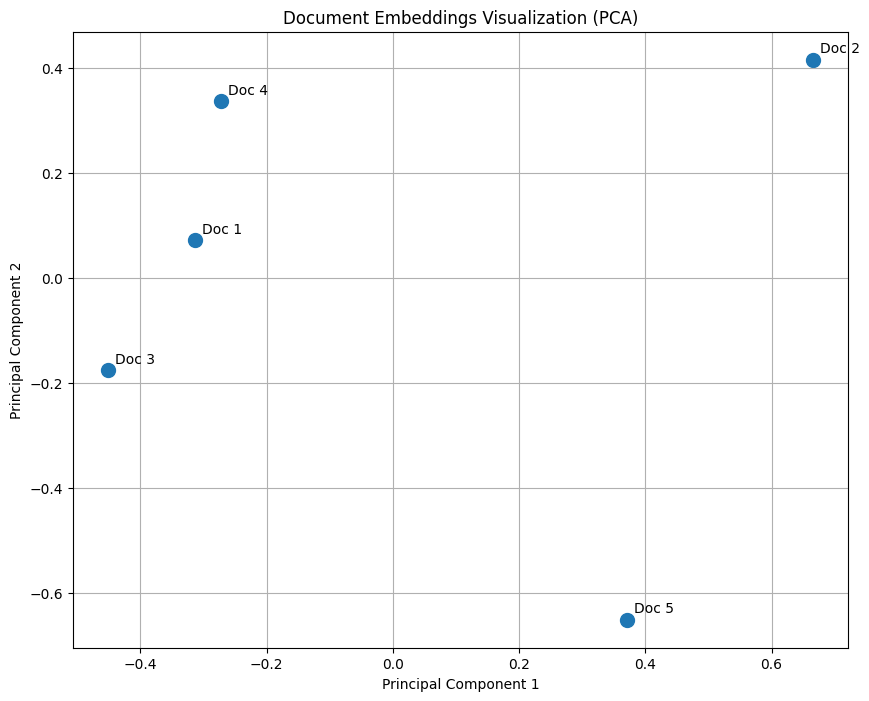

Document 1: I love machine learning and AI
Document 2: Recommendation systems are powerful
Document 3: AI and machine learning are transforming industries
Document 4: Natural language processing is a subfield of AI
Document 5: Deep learning models require large datasets


In [68]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Plot the embeddings
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=100)

# Add labels for each document
for i, doc in enumerate(documents):
    plt.annotate(f"Doc {i+1}", (embeddings_2d[i, 0], embeddings_2d[i, 1]), 
                 xytext=(5, 5), textcoords='offset points')
    
plt.title('Document Embeddings Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Print the documents for reference
for i, doc in enumerate(documents):
    print(f"Document {i+1}: {doc}")

## 3. Document Similarity Using Embeddings

Now that we have document embeddings, we can calculate similarity between documents.

In [69]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between all document pairs
similarity_matrix = cosine_similarity(embeddings)

# Create a DataFrame for better visualization
similarity_df = pd.DataFrame(similarity_matrix, 
                             index=[f"Doc {i+1}" for i in range(len(documents))],
                             columns=[f"Doc {i+1}" for i in range(len(documents))])

print("Similarity matrix:")
similarity_df

Similarity matrix:


,Doc 1,Doc 2,Doc 3,Doc 4,Doc 5
Doc 1,1.000000,0.304624,0.597442,0.485594,0.316660
Doc 2,0.304624,1.000000,0.156274,0.224550,0.273980
Doc 3,0.597442,0.156274,1.000000,0.370821,0.292608
Doc 4,0.485594,0.224550,0.370821,1.000000,0.232794
Doc 5,0.316660,0.273980,0.292608,0.232794,1.000000


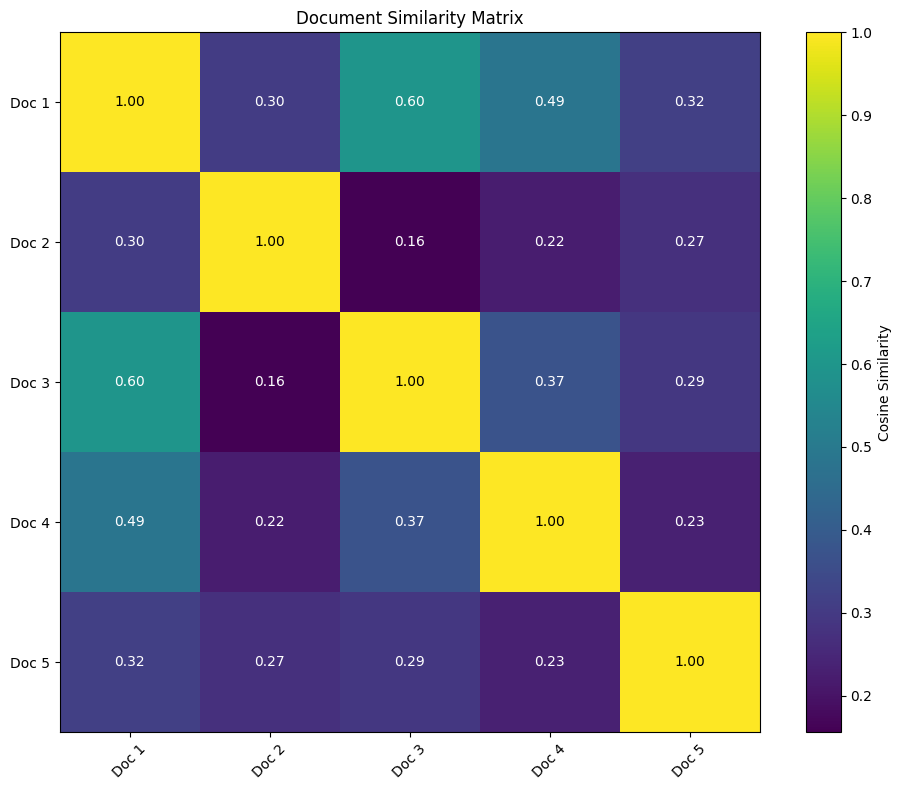

In [70]:
# Visualize the similarity matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.title('Document Similarity Matrix')
plt.xticks(range(len(documents)), [f"Doc {i+1}" for i in range(len(documents))], rotation=45)
plt.yticks(range(len(documents)), [f"Doc {i+1}" for i in range(len(documents))])

# Add similarity values as text
for i in range(len(documents)):
    for j in range(len(documents)):
        plt.text(j, i, f"{similarity_matrix[i, j]:.2f}", 
                 ha="center", va="center", color="white" if similarity_matrix[i, j] < 0.7 else "black")

plt.tight_layout()
plt.show()

### 3.1 Finding Similar Documents

Let's create a function to find the most similar documents to a given document.

In [71]:
def find_similar_documents(doc_index, similarity_matrix, documents, top_n=3):
    """
    Find the most similar documents to the document at doc_index.
    
    Parameters:
    -----------
    doc_index : int
        Index of the target document
    similarity_matrix : numpy.ndarray
        Matrix of similarity scores between documents
    documents : list
        List of document texts
    top_n : int, default=3
        Number of similar documents to return
        
    Returns:
    --------
    list of tuple
        List of (index, similarity, document) tuples for the most similar documents
    """
    # Get similarities for the target document
    similarities = similarity_matrix[doc_index]
    
    # Get indices of most similar documents (excluding the document itself)
    similar_indices = similarities.argsort()[::-1][1:top_n+1]
    
    # Create a list of (index, similarity, document) tuples
    similar_docs = [(idx, similarities[idx], documents[idx]) for idx in similar_indices]
    
    return similar_docs

In [72]:
# Test the function for each document
for i, doc in enumerate(documents):
    print(f"\nDocument {i+1}: {doc}")
    print("Similar documents:")
    similar_docs = find_similar_documents(i, similarity_matrix, documents)
    for j, (idx, similarity, similar_doc) in enumerate(similar_docs):
        print(f"  {j+1}. Document {idx+1} (Similarity: {similarity:.4f}): {similar_doc}")


Document 1: I love machine learning and AI
Similar documents:
  1. Document 3 (Similarity: 0.5974): AI and machine learning are transforming industries
  2. Document 4 (Similarity: 0.4856): Natural language processing is a subfield of AI
  3. Document 5 (Similarity: 0.3167): Deep learning models require large datasets

Document 2: Recommendation systems are powerful
Similar documents:
  1. Document 1 (Similarity: 0.3046): I love machine learning and AI
  2. Document 5 (Similarity: 0.2740): Deep learning models require large datasets
  3. Document 4 (Similarity: 0.2246): Natural language processing is a subfield of AI

Document 3: AI and machine learning are transforming industries
Similar documents:
  1. Document 1 (Similarity: 0.5974): I love machine learning and AI
  2. Document 4 (Similarity: 0.3708): Natural language processing is a subfield of AI
  3. Document 5 (Similarity: 0.2926): Deep learning models require large datasets

Document 4: Natural language processing is a subfiel

## 4. Using Our TextProcessor Class

Now let's use the TextProcessor class we created in our project to process and represent text data.

In [73]:
import sys
import os

# Add the project root to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import our TextProcessor class
from src.features.text_processor import TextProcessor

In [74]:
# Create a TextProcessor instance
processor = TextProcessor(
    lowercase=True,
    remove_punctuation=True,
    remove_stopwords=True,
    stemming=False,
    lemmatization=True
)

# Process our sample documents
processed_docs = processor.preprocess_documents(documents)

# Compare original and processed documents
for i, (original, processed) in enumerate(zip(documents, processed_docs)):
    print(f"Document {i+1}:")
    print(f"  Original: {original}")
    print(f"  Processed: {processed}\n")

Document 1:
  Original: I love machine learning and AI
  Processed: love machine learning ai

Document 2:
  Original: Recommendation systems are powerful
  Processed: recommendation system powerful

Document 3:
  Original: AI and machine learning are transforming industries
  Processed: ai machine learning transforming industry

Document 4:
  Original: Natural language processing is a subfield of AI
  Processed: natural language processing subfield ai

Document 5:
  Original: Deep learning models require large datasets
  Processed: deep learning model require large datasets



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dario\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 4.1 Creating TF-IDF Vectors with TextProcessor

In [75]:
# Create TF-IDF vectors using our processor
tfidf_matrix, feature_names = processor.create_tfidf_vectors(documents)

print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")
print(f"Number of Features: {len(feature_names)}")
print(f"Sample Features: {feature_names[:10]}")

# Convert to DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
tfidf_df

TF-IDF Matrix Shape: (5, 18)
Number of Features: 18
Sample Features: ['ai' 'datasets' 'deep' 'industry' 'language' 'large' 'learning' 'love'
 'machine' 'model']


,ai,datasets,deep,industry,language,large,learning,love,machine,model,natural,powerful,processing,recommendation,require,subfield,system,transforming
0,0.419559,0.000000,0.000000,0.000000,0.000000,0.000000,0.419559,0.626477,0.505438,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.57735,0.000000,0.57735,0.000000,0.000000,0.57735,0.000000
2,0.355549,0.000000,0.000000,0.530899,0.000000,0.000000,0.355549,0.000000,0.428326,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.530899
3,0.317527,0.000000,0.000000,0.000000,0.474125,0.000000,0.000000,0.000000,0.000000,0.000000,0.474125,0.00000,0.474125,0.00000,0.000000,0.474125,0.00000,0.000000
4,0.000000,0.428411,0.428411,0.000000,0.000000,0.428411,0.286912,0.000000,0.000000,0.428411,0.000000,0.00000,0.000000,0.00000,0.428411,0.000000,0.00000,0.000000


### 4.2 Extracting Keywords with TextProcessor

In [76]:
# Extract keywords from each document
for i, doc in enumerate(documents):
    keywords = processor.extract_keywords(doc, top_n=3)
    print(f"Document {i+1}: {doc}")
    print("Top keywords:")
    for keyword, score in keywords:
        print(f"  - {keyword}: {score:.4f}")
    print()

Document 1: I love machine learning and AI
Top keywords:
  - ai: 0.5000
  - learning: 0.5000
  - love: 0.5000

Document 2: Recommendation systems are powerful
Top keywords:
  - powerful: 0.5774
  - recommendation: 0.5774
  - system: 0.5774

Document 3: AI and machine learning are transforming industries
Top keywords:
  - ai: 0.4472
  - industry: 0.4472
  - learning: 0.4472

Document 4: Natural language processing is a subfield of AI
Top keywords:
  - ai: 0.4472
  - language: 0.4472
  - natural: 0.4472

Document 5: Deep learning models require large datasets
Top keywords:
  - datasets: 0.4082
  - deep: 0.4082
  - large: 0.4082



### 4.3 Computing Document Similarity with TextProcessor

In [77]:
# Compute similarity between document pairs
similarity_matrix = np.zeros((len(documents), len(documents)))

for i in range(len(documents)):
    for j in range(len(documents)):
        similarity = processor.compute_document_similarity(documents[i], documents[j], method='tfidf')
        similarity_matrix[i, j] = similarity

# Create a DataFrame for better visualization
similarity_df = pd.DataFrame(similarity_matrix, 
                             index=[f"Doc {i+1}" for i in range(len(documents))],
                             columns=[f"Doc {i+1}" for i in range(len(documents))])

print("Similarity matrix using TextProcessor:")
similarity_df

Similarity matrix using TextProcessor:


,Doc 1,Doc 2,Doc 3,Doc 4,Doc 5
Doc 1,1.000000,0.0,0.514839,0.133221,0.120377
Doc 2,0.000000,1.0,0.000000,0.000000,0.000000
Doc 3,0.514839,0.0,1.000000,0.112896,0.102011
Doc 4,0.133221,0.0,0.112896,1.000000,0.000000
Doc 5,0.120377,0.0,0.102011,0.000000,1.000000


## 5. Comparing Different Representation Methods

Let's compare the similarity matrices produced by different representation methods.

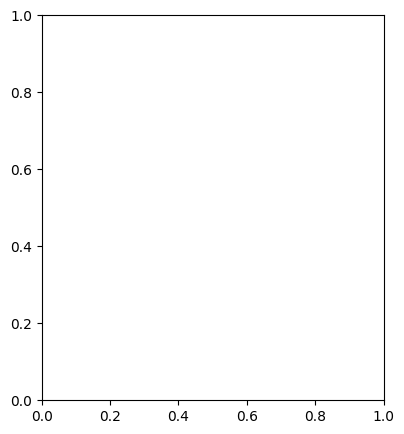

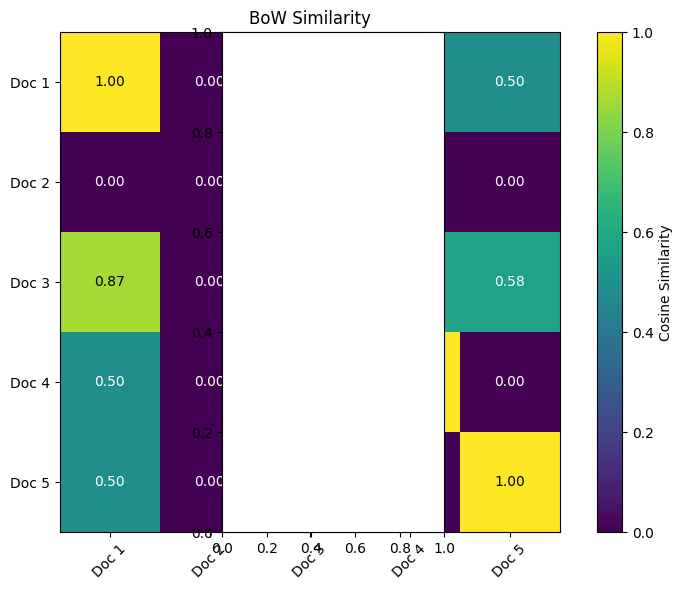

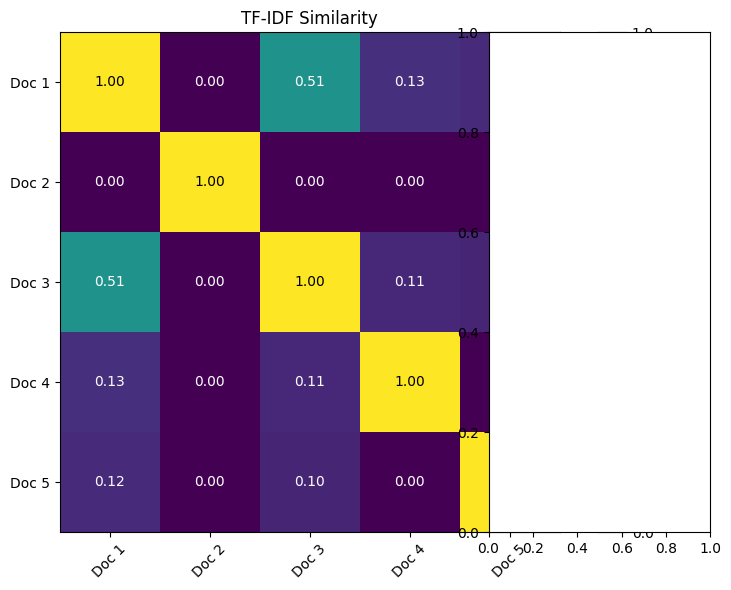

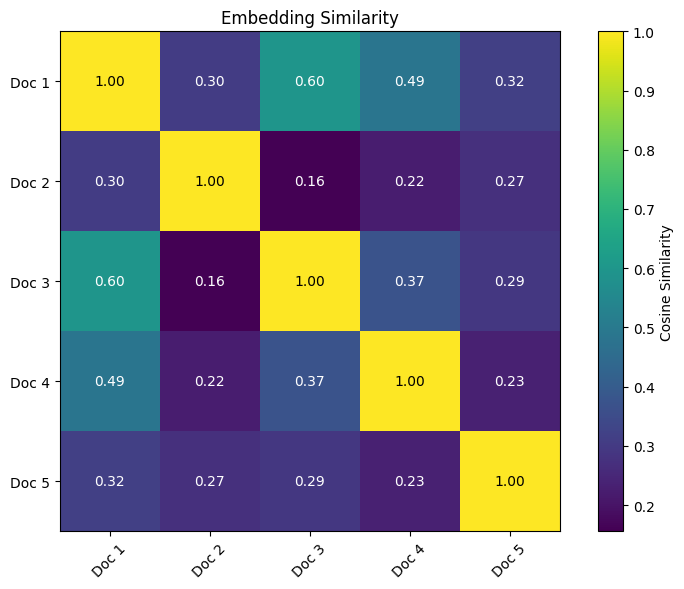

In [78]:
# Compute similarity using BoW
bow_similarity_matrix = np.zeros((len(documents), len(documents)))

for i in range(len(documents)):
    for j in range(len(documents)):
        similarity = processor.compute_document_similarity(documents[i], documents[j], method='bow')
        bow_similarity_matrix[i, j] = similarity

# Create a function to visualize similarity matrices
def plot_similarity_matrix(matrix, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Cosine Similarity')
    plt.title(title)
    plt.xticks(range(len(documents)), [f"Doc {i+1}" for i in range(len(documents))], rotation=45)
    plt.yticks(range(len(documents)), [f"Doc {i+1}" for i in range(len(documents))])
    
    # Add similarity values as text
    for i in range(len(documents)):
        for j in range(len(documents)):
            plt.text(j, i, f"{matrix[i, j]:.2f}", 
                     ha="center", va="center", color="white" if matrix[i, j] < 0.7 else "black")
    
    plt.tight_layout()

# Plot the similarity matrices
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plot_similarity_matrix(bow_similarity_matrix, 'BoW Similarity')

plt.subplot(1, 3, 2)
plot_similarity_matrix(similarity_matrix, 'TF-IDF Similarity')

plt.subplot(1, 3, 3)
plot_similarity_matrix(cosine_similarity(embeddings), 'Embedding Similarity')

plt.tight_layout()
plt.show()

## 6. Building a Simple Recommendation Function

Now let's create a simple recommendation function that suggests similar documents based on a query.

In [79]:
def recommend_similar_documents(query, document_collection, processor, model=None, top_n=3, method='tfidf'):
    """
    Recommend similar documents to a query.
    
    Parameters:
    -----------
    query : str
        The query text
    document_collection : list of str
        Collection of documents to search in
    processor : TextProcessor
        Text processor instance
    model : SentenceTransformer, default=None
        Sentence transformer model for embeddings (if method='embedding')
    top_n : int, default=3
        Number of recommendations to return
    method : str, default='tfidf'
        Method to use ('tfidf', 'bow', or 'embedding')
        
    Returns:
    --------
    list of tuple
        List of (index, similarity, document) tuples for the most similar documents
    """
    similarities = []
    
    if method == 'embedding' and model is not None:
        # Generate embeddings
        query_embedding = model.encode([query])[0]
        doc_embeddings = model.encode(document_collection)
        
        # Calculate similarities
        for i, doc_embedding in enumerate(doc_embeddings):
            sim = cosine_similarity([query_embedding], [doc_embedding])[0][0]
            similarities.append((i, sim, document_collection[i]))
    else:
        # Use TextProcessor for TF-IDF or BoW
        for i, doc in enumerate(document_collection):
            sim = processor.compute_document_similarity(query, doc, method=method)
            similarities.append((i, sim, doc))
    
    # Sort by similarity (descending)
    similarities.sort(key=lambda x: x[1], reverse=True)
    
    return similarities[:top_n]

In [80]:
# Test the recommendation function with different methods
query = "I'm interested in artificial intelligence and machine learning"
print(f"Query: {query}\n")

print("TF-IDF Recommendations:")
tfidf_recommendations = recommend_similar_documents(query, documents, processor, method='tfidf')
for i, (idx, similarity, doc) in enumerate(tfidf_recommendations):
    print(f"  {i+1}. Document {idx+1} (Similarity: {similarity:.4f}): {doc}")

print("\nBoW Recommendations:")
bow_recommendations = recommend_similar_documents(query, documents, processor, method='bow')
for i, (idx, similarity, doc) in enumerate(bow_recommendations):
    print(f"  {i+1}. Document {idx+1} (Similarity: {similarity:.4f}): {doc}")

print("\nEmbedding Recommendations:")
embedding_recommendations = recommend_similar_documents(query, documents, processor, model=model, method='embedding')
for i, (idx, similarity, doc) in enumerate(embedding_recommendations):
    print(f"  {i+1}. Document {idx+1} (Similarity: {similarity:.4f}): {doc}")

Query: I'm interested in artificial intelligence and machine learning

TF-IDF Recommendations:
  1. Document 1 (Similarity: 0.6569): I love machine learning and AI
  2. Document 3 (Similarity: 0.5567): AI and machine learning are transforming industries
  3. Document 5 (Similarity: 0.1833): Deep learning models require large datasets

BoW Recommendations:
  1. Document 3 (Similarity: 0.8165): AI and machine learning are transforming industries
  2. Document 1 (Similarity: 0.7071): I love machine learning and AI
  3. Document 5 (Similarity: 0.7071): Deep learning models require large datasets

Embedding Recommendations:
  1. Document 1 (Similarity: 0.6964): I love machine learning and AI
  2. Document 3 (Similarity: 0.5370): AI and machine learning are transforming industries
  3. Document 4 (Similarity: 0.4264): Natural language processing is a subfield of AI


## 7. Conclusion

In this notebook, we've explored different ways to represent text data for our recommendation system:

1. **Bag of Words (BoW)**: Simple count-based representation
2. **TF-IDF**: Weighted representation that considers term frequency and document frequency
3. **Word Embeddings**: Dense vector representations that capture semantic meaning

We've also built a simple recommendation function that can suggest similar documents based on a query using different representation methods.

Key takeaways:
- Different representation methods capture different aspects of text similarity
- Embeddings generally capture semantic similarity better than BoW or TF-IDF
- Our TextProcessor class provides a convenient way to preprocess text and compute similarities

In the next lesson, we'll build on these foundations to create a more sophisticated recommendation system.